In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

In this assignment, you will upload a dataset and reproduce a few visualizations. Start by uploading the "datasets-agro.csv" dataset. 

In [0]:
# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

In [0]:
# upload datasets-agro.csv
upload_files()

In [0]:
agro_df = pd.read_csv("datasets-agro.csv")

In [0]:
Next, use some of the EDA techniques in pandas to get a feel for the dataset scheme again.

In [0]:
agro_df.head()

In [0]:
agro_df.describe()

In [0]:
agro_df.info()

In [0]:
agro_df.region.value_counts()

# Visualization 1

Reproduce the bar graph found in section 1) of the supplementary document. You must choose your own title. If there are any enhancements you think would make the graph more useful (color changes or extra text), feel free to add that.

1 mark each:

*   Getting data into the correct shape
*   Plotting the bar graph
*   Having a title and axis labels



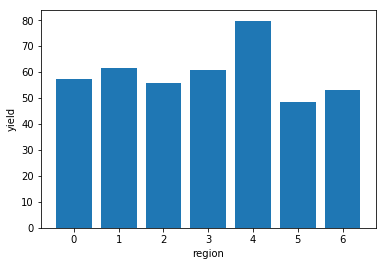

In [0]:
yield_avg_df = (agro_df.groupby("region").mean())["yield"].reset_index()

plt.figure()
plt.bar(yield_avg_df.region, yield_avg_df["yield"])

## ask them to make appropriate colours, labels, title, etc.

plt.xlabel("region")
plt.ylabel("yield")

plt.show()


#Visualization 2

Reproduce the figure found in section 2 of the supplementary document. Notice that this graph requires subplots. Please add titles and appropriate axis labels to each plot. Each plot shows data for a different region. It is very important to this task that each plot shows only the data from a single region.

Marks (1 each):

*    Identify and use the correct method for making the plot
*    Set up the subplots correctly
*    Plot data for each region in its own subplot
*    Have each subplot use a different colour
*    Include useful titles, axis labels, and have the figure be an appropriate size

In [0]:
yield_avg_df

,region,yield
0,0,57.152678
1,1,61.532329
2,2,55.769118
3,3,60.660840
4,4,79.794902
5,5,48.546193
6,6,52.935595


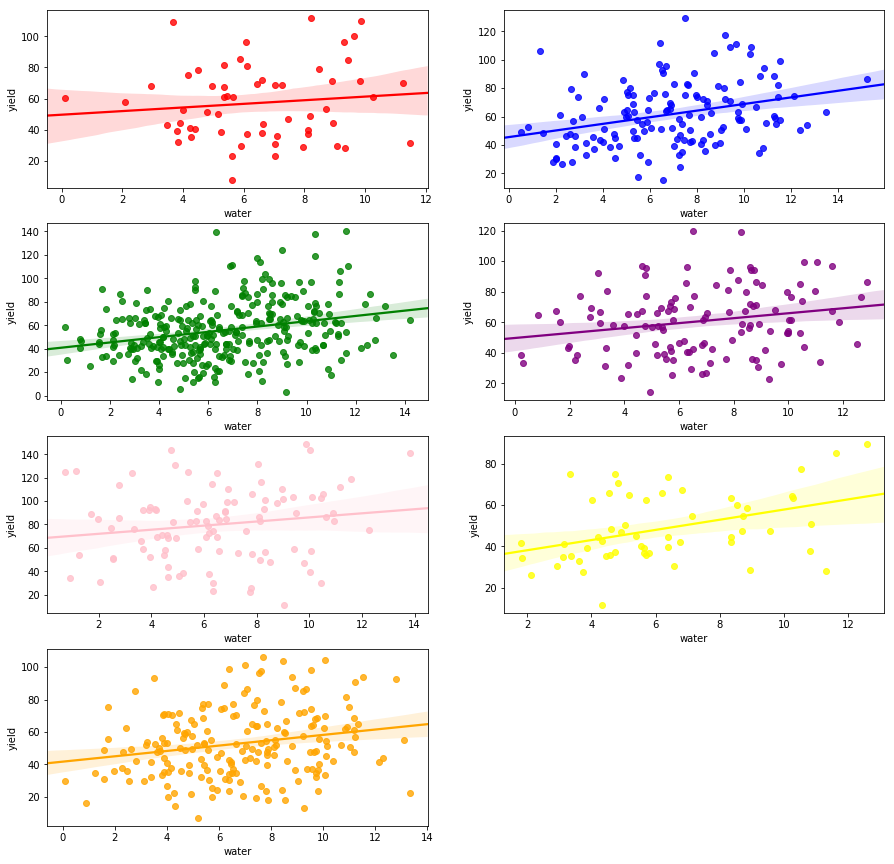

In [0]:
plt.figure(figsize=(15, 15))
color_array=["red", "blue", "green", "purple", "pink", "yellow", "orange"]
for i in range(7):
    plt.subplot(4, 2, i+1)
    seaborn.regplot(x="water",
                    y="yield",
                    data=agro_df.loc[agro_df.region==i,:],
                    color=color_array[i])
plt.show()

#Visualization 3

Reproduce the figure found in section 3 of the supplementary document. The plot is showing the co-occurence frequency of two categorical variables: fertilizer_usage and region. Notice that this requires you to use a method not shown in the notes. In Data Science it is very common to have to look through an API and find an appropriate function. You can use the Seaborn API as reference:

https://seaborn.pydata.org/api.html

Also feel free to use google or stackoverflow to point you in the right direction. Please add an appropriate title and axis labels to the plot. 

Hint: In my solution, I use both groupby and pivot (dataframe methods from pandas) to help transform my data. There is probably multiple ways of transforming the required variables.

Marks:

*    Identify and use the correct method for making the plot (1 mark)
*    Transform data for use with the method you found (2 marks)
*    Normalize data (notice the range of values on the right side of the graph) (1 mark)
*    Include useful titles, axis labels, and have the figure be an appropriate size (1 mark)

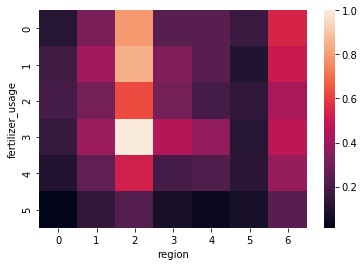

In [0]:
g = agro_df.groupby(["fertilizer_usage", "region"]).size()
g = g.reset_index(name="count")
g = g.pivot(index="fertilizer_usage", columns="region", values="count")

#print(agro_df)

plt.figure()
seaborn.heatmap(g / g.max().max())
plt.show()
